In [1]:
import sklearn.metrics
import numpy as np
import pandas as pd

In [2]:
import transparentai.models.classification as classification
import transparentai.models.regression as regression
import transparentai.models.evaluation as evaluation

In [3]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
metrics = ['accuracy','f1',lambda y_true, y_pred:1]

print(classification.compute_metrics(y_true, y_pred, metrics))
print(evaluation.compute_metrics(y_true, y_pred, metrics, classification=True))


y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0.2, 0.49, 0, 1, 0.3, 0.8, 0, 1]

print(classification.compute_metrics(y_true, y_pred, metrics))
print(evaluation.compute_metrics(y_true, y_pred, metrics, classification=True))

y_true = [0, 0, 0, 1, 2, 1, 1, 1, 2]
y_pred = [0, 1, 0, 1, 1, 1, 0, 1, 2]

metrics = ['accuracy','f1_macro',lambda y_true, y_pred:1]
print(classification.compute_metrics(y_true, y_pred, metrics))
print(evaluation.compute_metrics(y_true, y_pred, metrics, classification=True))
    

y_true = [3, 5, 2.5, 7, 9, 5.5]
y_pred = [2.5, 5, 4, 8, 9, 4.5]
metrics = ['RMSE','MAE','mean_squared_log_error',lambda y_true, y_pred:1]

print(regression.compute_metrics(y_true, y_pred, metrics))
print(evaluation.compute_metrics(y_true, y_pred, metrics, classification=False))

{'accuracy': 0.625, 'f1': 0.6666666666666665, 'custom_1': 1}
{'accuracy': 0.625, 'f1': 0.6666666666666665, 'custom_1': 1}
{'accuracy': 0.75, 'f1': 0.7499999999999999, 'custom_1': 1}
{'accuracy': 0.75, 'f1': 0.7499999999999999, 'custom_1': 1}
{'accuracy': 0.6666666666666666, 'f1_macro': 0.6666666666666665, 'custom_1': 1}
{'accuracy': 0.6666666666666666, 'f1_macro': 0.6666666666666665, 'custom_1': 1}
{'RMSE': 0.8660254037844386, 'MAE': 0.6666666666666666, 'mean_squared_log_error': 0.031137926523503903, 'custom_1': 1}
{'RMSE': 0.8660254037844386, 'MAE': 0.6666666666666666, 'mean_squared_log_error': 0.031137926523503903, 'custom_1': 1}


In [4]:
from transparentai.datasets import load_adult, load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = load_adult()
X, Y = data.drop(columns='income'), data['income']
X = X.select_dtypes('number')
Y = Y.replace({'>50K':1, '<=50K':0})
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
clf.score(X_train,Y_train)

0.9988082141547489

In [5]:
y_true = Y_train
y_true_valid = Y_valid
y_pred = clf.predict_proba(X_train)
y_pred_valid = clf.predict_proba(X_valid)

In [6]:
metrics = ['accuracy', 'roc_auc', 'f1', 'recall', 'precision']
classification.compute_metrics(y_true_valid, y_pred_valid, metrics)

{'accuracy': 0.8122595855565207,
 'roc_auc': 0.8292311643809287,
 'f1': 0.5698038100653967,
 'recall': 0.5270910047343503,
 'precision': 0.620049504950495}

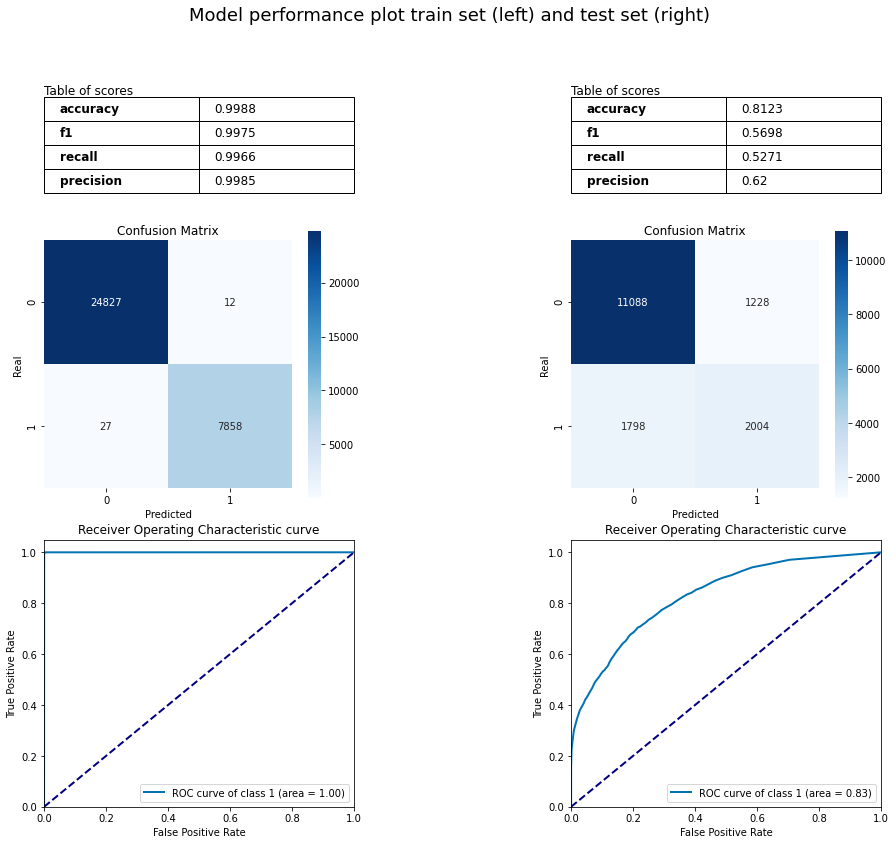

In [7]:
classification.plot_performance(y_true, y_pred, y_true_valid, y_pred_valid)

In [8]:
data = load_iris()
X, Y = data.drop(columns='iris plant'), data['iris plant'].replace({'setosa':0, 'versicolor':1, 'virginica':2})
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
clf.score(X_train,Y_train)

1.0

In [9]:
y_true = Y_train
y_true_valid = Y_valid
y_pred = clf.predict_proba(X_train)#[:,1]
y_pred_valid = clf.predict_proba(X_valid)#[:,1]

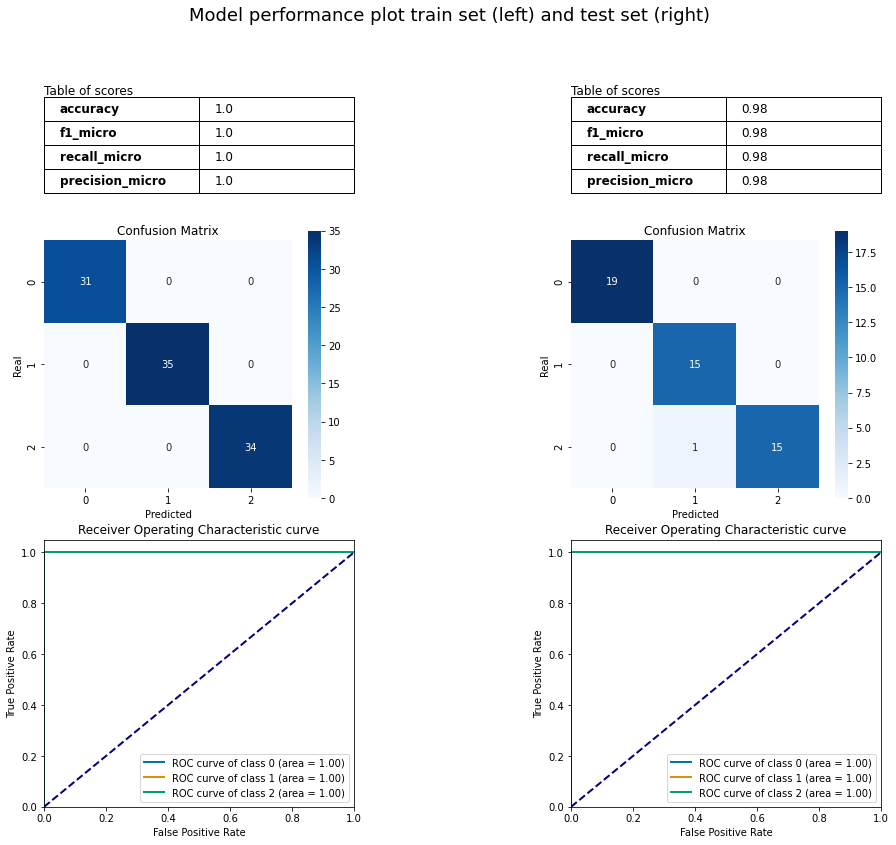

In [10]:
metrics = ['accuracy','confusion_matrix','roc_auc']
classification.plot_performance(y_true, y_pred, y_true_valid, y_pred_valid)

In [11]:
from transparentai.datasets import load_boston
from sklearn.linear_model import LinearRegression

data = load_boston()
X, Y = data.drop(columns='MEDV'), data['MEDV']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)
regr = LinearRegression()
regr.fit(X_train, Y_train)
regr.score(X_train, Y_train)

0.7392344370995025

In [12]:
y_true = Y_train
y_pred = regr.predict(X_train)
y_true_valid = Y_valid
y_pred_valid = regr.predict(X_valid)

In [13]:
metrics = ['MAE', 'MSE', 'RMSE', 'r2']
regression.compute_metrics(y_true_valid, y_pred_valid, metrics)
regression.compute_metrics(y_true, y_pred, metrics)

{'MAE': 3.3764189163531353,
 'MSE': 22.985015840300804,
 'RMSE': 4.794269062151269,
 'r2': 0.7392344370995025}

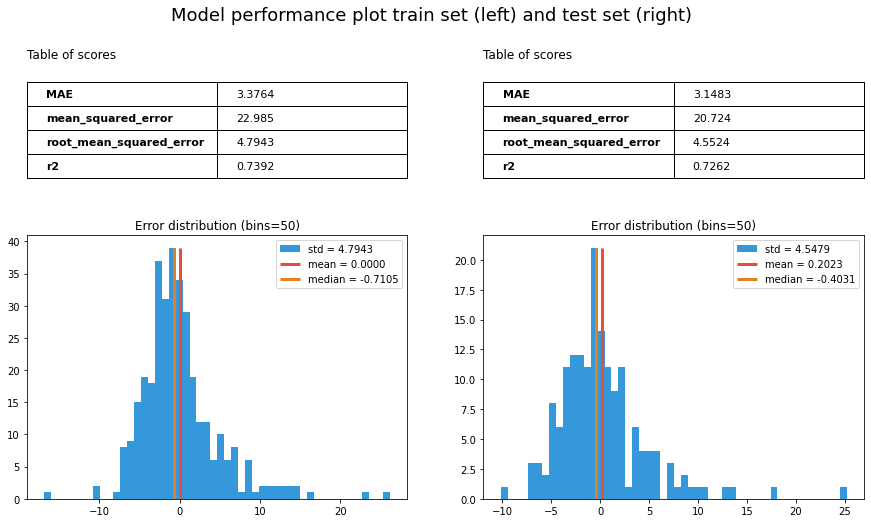

In [14]:
regression.plot_performance(y_true, y_pred, y_true_valid, y_pred_valid)